# Portfolio Assignment: Text Classification

Linus Fackler

The dataset used in this notebook can be found here:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud, STOPWORDS

### Read data

In [2]:
df = pd.read_csv('Data/IMDB Dataset.csv')
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.dtypes

review       object
sentiment    object
dtype: object

We are going to change the column name from sentiment to 'is_positive', meaning a movie review is positive.
Value 'positive' will be changed to 1 and 'negative' to 0.

In [4]:
# rename column name 'sentiment' to 'is_positive'
df.rename(columns={'sentiment':'is_positive'}, inplace=True)

# positive -> 1
df.loc[df['is_positive'] == 'positive', 'is_positive'] = 1

# negative -> 0
df.loc[df['is_positive'] == 'negative', 'is_positive'] = 0

# converting type of 'is_positive' from object to int
df['is_positive'] = df['is_positive'].astype(str).astype(int)

df.head()

,review,is_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


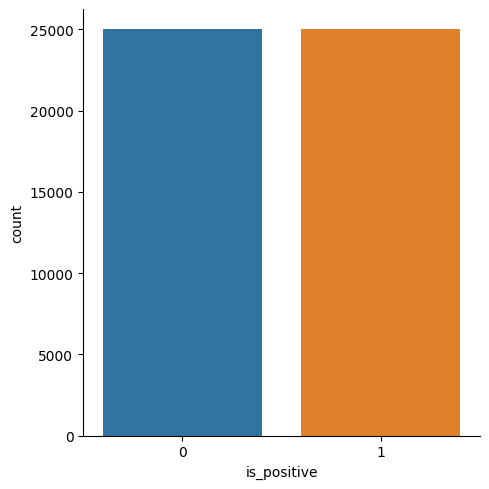

In [5]:
sb.catplot(x='is_positive', kind='count', data=df)

### Visualize most important words

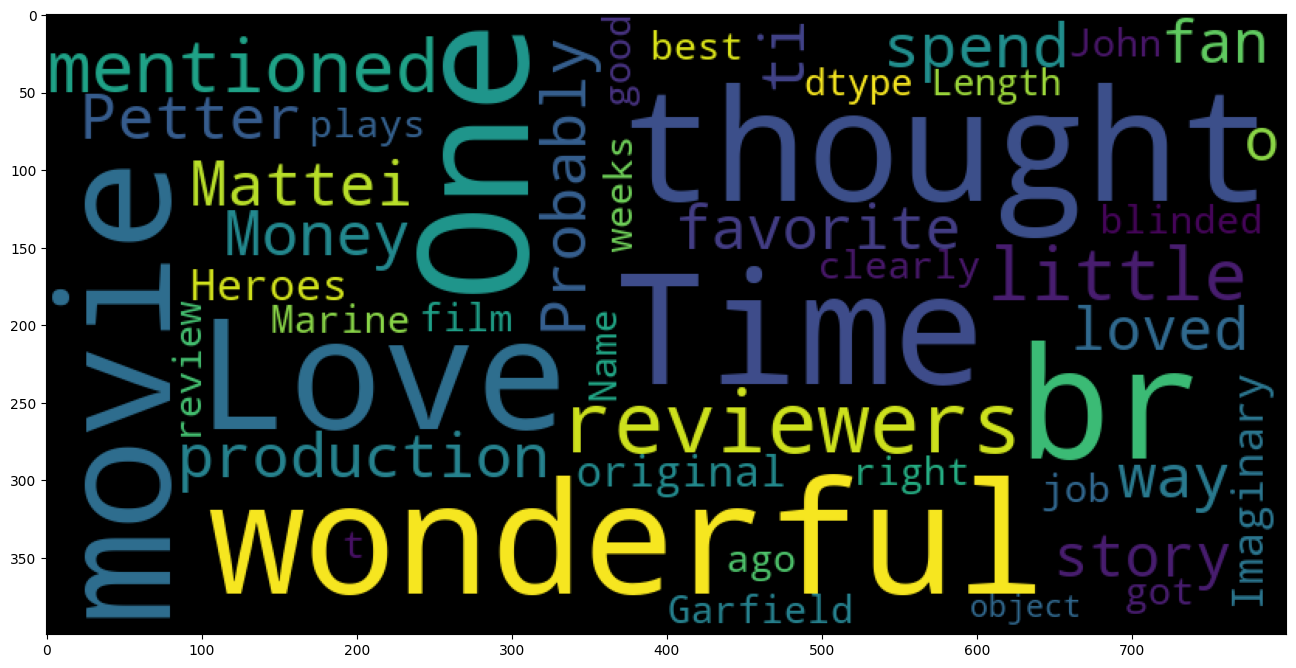

In [6]:
wordcloud = WordCloud(background_color = 'black', stopwords = STOPWORDS, max_words = 100, max_font_size = 100, random_state = 15, width = 800, height = 400)

plt.figure(figsize = (16, 12))
wordcloud.generate(str(df.loc[df['is_positive'] == 1, 'review']))
plt.imshow(wordcloud)

### tf-idf processing and train - test split

In [7]:
x = df.review
y = df.is_positive

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1234)
x_train.shape

(37500,)

### tfidf vectorizer

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=2)

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

## Naive Bayes

In [9]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [10]:
pred_nb = nb.predict(x_test)

### Confusion Matrix of Naive Payes prediction

In [11]:
confusion_matrix(y_test, pred_nb)

array([[5246,  973],
       [ 804, 5477]])

### Accuracy of Naive Bayes prediction

In [22]:
# acc_nb = accuracy_score(y_test, pred_nb)
print(acc_nb = accuracy_score(y_test, pred_nb))
print(acc_nb = accuracy_score(pred_nb, y_test))

# print(classification_report(y_test, pred_nb))

0.85784

## Logistic Regression

In [13]:
lr = LogisticRegression(C=2.5, n_jobs=4, solver='lbfgs', random_state=17, verbose=1)
lr.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59930D+04    |proj g|=  1.68197D+02


 This problem is unconstrained.



At iterate   50    f=  9.73493D+03    |proj g|=  8.95299D+00

At iterate  100    f=  9.72990D+03    |proj g|=  5.30324D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5001    100    115      1     0     0   5.303D-01   9.730D+03
  F =   9729.8986855898274     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(C=2.5, n_jobs=4, random_state=17, verbose=1)

In [14]:
pred_lr = lr.predict(x_test)

### Confusion Matrix of Logistic Regression

In [15]:
confusion_matrix(y_test, pred_lr)

array([[5501,  718],
       [ 626, 5655]])

### Accuracy of Logistic Regression

In [16]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6219
           1       0.89      0.90      0.89      6281

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



## Neural Networks

In [17]:
nn = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
nn.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [18]:
pred_nn = nn.predict(x_test)

### Confusion Matrix of Neural Networks

In [19]:
confusion_matrix(y_test, pred_nn)

array([[5347,  872],
       [ 893, 5388]])

### Accuracy of Neural Networks

In [20]:
print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6219
           1       0.86      0.86      0.86      6281

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500

